# Datos CDMX

## Extracción, Transformación y Limpieza

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

In [2]:
# https://datos.cdmx.gob.mx/explore/dataset/base-covid-sinave/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C

# Tabla de comorbilidades         # Clasificaciones:

# Tabla de sintomas               # Clasificaciones: Positivo a Covid y Negativo

In [3]:
url = "https://raw.githubusercontent.com/carloscerlira/Datasets/master/COVID19CDMX/train.csv"
df = pd.read_csv(url);

In [4]:
print(df.shape)
df.head()

(100000, 92)


,Unnamed: 0,origen,sector,cveentuni,entidad,delega,unidad,fechreg,sexo,entresi,...,diaspuerp,antipireticos,uci,linaje,viaje1,viaje2,viaje3,viaje4,viaje5,rango_de_edad
0,808941,USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III XOCHIMILCO,2020-07-17,FEMENINO,CIUDAD DE MEXICO,...,NaN,SI,NaN,NaN,Otro - AMECAMECA,NaN,NaN,NaN,NaN,61-70
1,808942,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III BEATRIZ VELAZCO DE ALEMAN.,2020-08-03,MASCULINO,CIUDAD DE MEXICO,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-30
2,808943,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III BEATRIZ VELAZCO DE ALEMAN.,2020-07-17,MASCULINO,CIUDAD DE MEXICO,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60
3,808944,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III DR. ATANACIO GARZA RIOS,2020-11-05,FEMENINO,CIUDAD DE MEXICO,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-20
4,808945,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III MEXICO-ESPAÑA,2020-08-13,FEMENINO,CIUDAD DE MEXICO,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-30


In [5]:
columns = ['fechreg', 'sexo', 'tipacien', 'fecdef', 'intubado', 'digcline', 'edad', 'estaemba', 'fiebre', 'tos', 'odinogia', 'disnea', 'irritabi', 'diarrea', 
           'dotoraci','calofrios', 'cefalea','mialgias', 'artral', 'ataedoge', 	'rinorrea', 	'polipnea', 	'vomito', 	'dolabdo', 	'conjun', 	'cianosis',
           'inisubis', 	'diabetes', 	'epoc', 	'asma', 	'inmusupr', 	'hiperten', 	'vihsida', 	'otracon', 	'enfcardi', 	'obesidad', 	'insrencr',
           'tabaquis', 'resdefin']

dfmini = df.loc[:,columns]
dfmini = dfmini[dfmini['resdefin'].isin(['NEGATIVO','SARS-CoV-2'])] 
print(dfmini.shape)
dfmini.head()

(90456, 39)


,fechreg,sexo,tipacien,fecdef,intubado,digcline,edad,estaemba,fiebre,tos,...,asma,inmusupr,hiperten,vihsida,otracon,enfcardi,obesidad,insrencr,tabaquis,resdefin
0,2020-07-17,FEMENINO,AMBULATORIO,NaN,NaN,NO,62,NO,SI,SI,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVO
1,2020-08-03,MASCULINO,AMBULATORIO,NaN,NaN,NO,30,NaN,SI,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVO
2,2020-07-17,MASCULINO,AMBULATORIO,NaN,NaN,NO,54,NaN,NO,NO,...,NO,NO,NO,NO,NO,NO,SI,NO,NO,SARS-CoV-2
3,2020-11-05,FEMENINO,AMBULATORIO,NaN,NaN,NO,19,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVO
4,2020-08-13,FEMENINO,AMBULATORIO,NaN,NaN,NO,25,NO,SI,NO,...,NO,SI,NO,NO,NO,NO,NO,NO,NO,NEGATIVO


In [6]:
nulls = (dfmini.isnull().sum()/len(df)).sort_values(ascending=False)[:5]
print(nulls)

fecdef      0.88121
intubado    0.83882
estaemba    0.37373
digcline    0.00052
resdefin    0.00000
dtype: float64


In [7]:
dfmini["fecdef"].fillna("NO", inplace=True)
dfmini["intubado"].fillna("NO", inplace=True)
dfmini["estaemba"].fillna("NO", inplace=True)
dfmini["digcline"].fillna("NO", inplace=True)
dfmini["fecdef"] = dfmini["fecdef"].map(lambda x: "SI" if x != "NO" else x)

In [8]:
(dfmini.isnull().sum()/len(dfmini)).sort_values(ascending=False)[:5]

resdefin     0.0
tos          0.0
cefalea      0.0
calofrios    0.0
dotoraci     0.0
dtype: float64

In [9]:
cat = {}
for col in dfmini:
  if col in ["fechreg", "edad"]: continue 
  map = {x:i for i,x in enumerate(dfmini[col].unique())}
  cat[col] = map
  dfmini[col] = dfmini[col].map(map)

dfmini['edad']= (dfmini['edad']-dfmini['edad'].mean())/dfmini['edad'].std()
dfmini.head()

,fechreg,sexo,tipacien,fecdef,intubado,digcline,edad,estaemba,fiebre,tos,...,asma,inmusupr,hiperten,vihsida,otracon,enfcardi,obesidad,insrencr,tabaquis,resdefin
0,2020-07-17,0,0,0,0,0,1.261033,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-08-03,1,0,0,0,0,-0.654537,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-07-17,1,0,0,0,0,0.782140,0,1,1,...,0,0,0,0,0,0,1,0,0,1
3,2020-11-05,0,0,0,0,0,-1.313014,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2020-08-13,0,0,0,0,0,-0.953845,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [10]:
# Hacemos dos dataframes, uno para comorbilidades y uno para sintomas
col_com  = ['sexo', 'tipacien', 'edad', 'diabetes',	'epoc', 'asma',	'inmusupr', 'hiperten', 'vihsida', 'otracon', 'enfcardi', 'obesidad', 'insrencr',
           'tabaquis', 'resdefin', 'fecdef']

col_sin = ['sexo', 'tipacien', 'intubado', 'digcline', 'edad', 'estaemba', 'fiebre', 'tos', 'odinogia', 'disnea', 'irritabi', 'diarrea', 
           'dotoraci','calofrios', 'cefalea', 'mialgias', 'artral', 'ataedoge', 'rinorrea', 'polipnea',	'vomito', 'dolabdo', 'conjun', 'cianosis',
           'inisubis', 'resdefin']

df_com = dfmini.loc[:,col_com]
df_com = df_com[df_com['resdefin']==1]
df_sin = dfmini.loc[:,col_sin]

In [11]:
df_hosp = dfmini.copy()
df_hosp.drop('fechreg', axis=1, inplace=True)
df_hosp.insert(0,'y',df_hosp.tipacien)
df_hosp.drop('tipacien', axis=1, inplace=True)
df_hosp.drop('fecdef', axis=1, inplace=True)
df_hosp.drop('resdefin', axis=1, inplace=True)
df_hosp.head()

df_hosp.loc[df_hosp.intubado==1,'y'] = 1
df_hosp.drop('intubado', axis=1, inplace=True)
df_hosp.head()

,y,sexo,digcline,edad,estaemba,fiebre,tos,odinogia,disnea,irritabi,...,epoc,asma,inmusupr,hiperten,vihsida,otracon,enfcardi,obesidad,insrencr,tabaquis
0,0,0,0,1.261033,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,-0.654537,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0.782140,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,-1.313014,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,-0.953845,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### K-Vecinos

### Sintomas

## Analisis y uso de algoritmos

In [ ]:
X = df_sin.iloc[:,:-1].values
y = df_sin.iloc[:,-1].values
X = np.concatenate((X[y==0][:len(y[y==1])], X[y==1]))
y = np.concatenate((y[y==0][:len(y[y==1])], y[y==1]))
print(X.shape)

(90456, 25)
(30654, 25)
(61308, 25)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
neigh.score(X_test, y_test)

0.6162126896101778

In [ ]:
conf = [[0,0],[0,0]]
for clf in [0, 1]:
    for pred_clf in [0, 1]:
        X_test_clf = X_test[y_test == clf]
        y_test_clf = y_test[y_test == clf]
        y_pred = neigh.predict(X_test_clf)
        cnt = len(y_pred[y_pred == pred_clf])
        prob = cnt/len(y_test_clf)
        conf[clf][pred_clf] = prob
    
for row in conf:
    print(row)

[0.6180016515276631, 0.38199834847233693]
[0.3855324633478331, 0.6144675366521669]


### Hospitalizados

In [ ]:
X = df_hosp.iloc[:,1:]
y = df_hosp.iloc[:,0]

print(X.shape)
print(X[y==1].shape)
X = np.concatenate((X[y==0][:len(y[y==1])], X[y==1]))
y = np.concatenate((y[y==0][:len(y[y==1])], y[y==1]))
print(X.shape)

(90456, 34)
(6626, 34)
(13252, 34)


In [ ]:
len(y[y == 1])/len(y)

0.5

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for j in range(10,11):
  neigh = KNeighborsClassifier(n_neighbors=j)
  neigh.fit(X_train, y_train)
  print(j, ' vecinos, score: ', neigh.score(X_test, y_test))

10  vecinos, score:  0.8709920784609582


In [ ]:
conf = [[0,0],[0,0]]
for clf in [0, 1]:
    for pred_clf in [0, 1]:
        X_test_clf = X_test[y_test == clf]
        y_test_clf = y_test[y_test == clf]
        y_pred = neigh.predict(X_test_clf)
        cnt = len(y_pred[y_pred == pred_clf])
        prob = cnt/len(y_test_clf)
        conf[clf][pred_clf] = prob

for row in conf:
    print(row)

[0.9358490566037736, 0.06415094339622641]
[0.193815987933635, 0.806184012066365]


### SVM

#### Sintomas

#### Hospitalizados

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8955111278762731

In [ ]:
conf = [[0,0],[0,0]]
for clfs in [0, 1]:
    for pred_clf in [0, 1]:
        X_test_clf = X_test[y_test == clfs]
        y_test_clf = y_test[y_test == clfs]
        y_pred =  clf.predict(X_test_clf)
        cnt = len(y_pred[y_pred == pred_clf])
        prob = cnt/len(y_test_clf)
        conf[clfs][pred_clf] = prob
    
for row in conf:
    print(row)

[0.9366037735849057, 0.06339622641509433]
[0.1455505279034691, 0.8544494720965309]


### Red Neuronal

In [ ]:
from keras import models
from keras import layers

In [ ]:
X = df_hosp.iloc[:,1:]
y = df_hosp.iloc[:,0]

X = np.concatenate((X[y==0][:len(y[y==1])], X[y==1]))
y = np.concatenate((y[y==0][:len(y[y==1])], y[y==1]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
m, n = len(X_train), len(X_train[0])
y_train = np.array([np.array([0, 1]) if y == 1 else np.array([1, 0]) for y in y_train])
y_test =  np.array([np.array([0, 1]) if y == 1 else np.array([1, 0]) for y in y_test])

In [ ]:
network = models.Sequential()
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(8, activation='relu'))
network.add(layers.Dense(2, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(X_test, y_test, epochs=30, batch_size=300)

Epoch 1/30
9/9 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5922
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6473
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.6741
Epoch 4/30
9/9 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6990
Epoch 5/30
9/9 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.7216
Epoch 6/30
9/9 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.7450
Epoch 7/30
9/9 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7627
Epoch 8/30
9/9 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7918
Epoch 9/30
9/9 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.8038
Epoch 10/30
9/9 [==============================] - 0s 1ms/step - loss: 0.5348 - accuracy: 0.8155
Epoch 11/30
9/9 [======================

In [ ]:
network.evaluate(X_train, y_train)

332/332 [==============================] - 0s 895us/step - loss: 0.3100 - accuracy: 0.8789


[0.3099795877933502, 0.8788793683052063]

### SBS

#### Hospitalizados

In [ ]:
hos

34
La mayor cantidad de éxitos es:  0.9226519337016574
La dimensión reducida es:  diarrea
La mayor cantidad de éxitos es:  0.9226519337016574
La dimensión reducida es:  sexo
La mayor cantidad de éxitos es:  0.9226519337016574
La dimensión reducida es:  estaemba
La mayor cantidad de éxitos es:  0.9226519337016574
La dimensión reducida es:  fiebre
La mayor cantidad de éxitos es:  0.9226519337016574
La dimensión reducida es:  tos
La mayor cantidad de éxitos es:  0.9226519337016574
La dimensión reducida es:  digcline
La mayor cantidad de éxitos es:  0.9226519337016574
La dimensión reducida es:  odinogia
La mayor cantidad de éxitos es:  0.9226519337016574
La dimensión reducida es:  artral
La mayor cantidad de éxitos es:  0.9226519337016574
La dimensión reducida es:  calofrios
La mayor cantidad de éxitos es:  0.9226519337016574
La dimensión reducida es:  rinorrea
La mayor cantidad de éxitos es:  0.9281767955801105
La dimensión reducida es:  polipnea
La mayor cantidad de éxitos es:  0.9281767

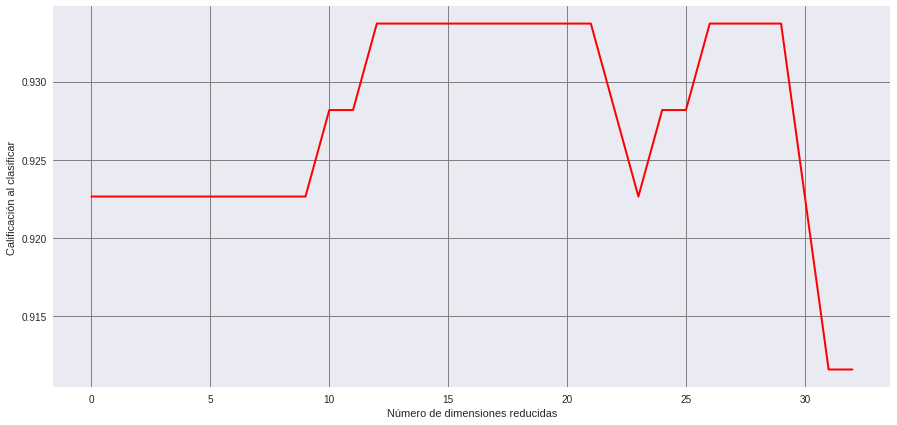

In [ ]:
def SBS(data,q):
  """
  Esta función aplica el algoritmo de Sequencial Backward Selection con k-vecinos

  Parámetros:
  - Entradas:
    - data = data set a analizar
    - q = número de dimensiones a seleccionar

  - Salidas:
    - ExitosPorDimension: Una lista de q elementos con la cantidad máxima de éxitos al eliminar una dimensión
  """
  # Este algoritmo recursivamente elimina la dimensión que al quitarla del análisis
  # hace que el número de éxitos de predicción sea máximo

  global tamaño, ExitosPorDimension
  if(not ExitosPorDimension):
        ExitosPorDimension = []
        tamaño = data.shape[1]-1
        print(tamaño)
  #print(exitopordimension)
  if (q == tamaño):   # Si hemos llegado a la dimensión deseada
    return (ExitosPorDimension) # Regresa la lista de éxitos por dimensión reducida
  else:
    exitos = np.zeros(data.shape[1]-1)  # Crea un contador de éxitos por cada columna
    X = data.iloc[:,1:]
    y = data.iloc[:,0]
    for j in range(X.shape[1]-1):
      datos = X.drop(X.columns[j], inplace=False, axis=1)
      X_train, X_test, y_train, y_test = train_test_split(datos, y, test_size=0.2, random_state=42)
      #print('analizando caracteristica ', j-1, ' de ', X_test.shape[1])
      #print(y_train)
      neigh.fit(X_train,y_train)
      exitos[j] = neigh.score(X_test, y_test)  # Aplica el clasificador de K vecinos cercanos
    #print('Los exitos son: ', exitos)
    print('La mayor cantidad de éxitos es: ', max(exitos))
    ExitosPorDimension.append(max(exitos))
    peor_caracteristica = np.where(exitos == max(exitos))[0][0]
    print('La dimensión reducida es: ' , X.columns[peor_caracteristica])
    #print(data.columns[peor_caracteristica+1])
    bestdata = X.drop(X.columns[peor_caracteristica], inplace=False, axis=1)  # Quita la columna que menos ayuda
    bestdata.insert(0,'y', y)
    SBS(bestdata,q+1) # Llamada recursiva
    return ExitosPorDimension


ExitosPorDimension = []
resultadosSBS = SBS(df_hosp.sample(frac=0.01, random_state=1),1)
plt.figure(figsize=(15,7))
plt.plot(resultadosSBS, linewidth=2, color = "red")
plt.xlabel('Número de dimensiones reducidas')
plt.ylabel('Calificación al clasificar')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.show()

# Datos México

## Extracción, Transformación y Limpieza

In [ ]:
# http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip

In [ ]:
url = "https://raw.githubusercontent.com/carloscerlira/Datasets/master/COVIDMX/train.csv"
df = pd.read_csv(url)

In [ ]:
print(df.shape)
df.dtypes

(100000, 41)


Unnamed: 0                int64
FECHA_ACTUALIZACION      object
ID_REGISTRO              object
ORIGEN                    int64
SECTOR                    int64
ENTIDAD_UM                int64
SEXO                      int64
ENTIDAD_NAC               int64
ENTIDAD_RES               int64
MUNICIPIO_RES             int64
TIPO_PACIENTE             int64
FECHA_INGRESO            object
FECHA_SINTOMAS           object
FECHA_DEF                object
INTUBADO                  int64
NEUMONIA                  int64
EDAD                      int64
NACIONALIDAD              int64
EMBARAZO                  int64
HABLA_LENGUA_INDIG        int64
INDIGENA                  int64
DIABETES                  int64
EPOC                      int64
ASMA                      int64
INMUSUPR                  int64
HIPERTENSION              int64
OTRA_COM                  int64
CARDIOVASCULAR            int64
OBESIDAD                  int64
RENAL_CRONICA             int64
TABAQUISMO                int64
OTRO_CAS

In [ ]:
df.head()

,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,3082316,2020-12-12,2a127e,1,12,26,2,26,26,33,2,2020-12-05,2020-12-05,9999-99-99,2,1,43,1,97,2,2,2,2,1,2,2,2,2,2,2,2,2,1,3,2,97,6,99,MÃ©xico,97,2
1,3082317,2020-12-12,1f090d,2,12,9,2,9,9,16,1,2020-10-06,2020-10-06,9999-99-99,97,2,38,1,97,2,2,2,2,2,2,1,2,2,2,2,2,99,1,4,2,97,6,99,MÃ©xico,97,97
2,3082318,2020-12-12,2ac746,2,4,28,2,28,28,41,1,2020-12-08,2020-12-03,9999-99-99,97,2,50,1,97,2,2,2,2,2,2,2,1,2,2,2,2,2,1,3,2,97,6,99,MÃ©xico,97,97
3,3082319,2020-12-12,2b6dd8,2,12,9,1,9,9,11,1,2020-12-08,2020-12-01,9999-99-99,97,2,40,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,1,3,99,MÃ©xico,97,97
4,3082320,2020-12-12,3cec31,1,12,15,2,15,15,13,2,2020-12-07,2020-12-05,9999-99-99,2,2,64,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,3,2,97,6,99,MÃ©xico,97,2


In [ ]:
colCom  = ['FECHA_SINTOMAS', 'SEXO', 'TIPO_PACIENTE', 'FECHA_DEF','INTUBADO',  'NEUMONIA', 'EDAD', 'EMBARAZO', 'DIABETES',	'EPOC', 'ASMA',	'INMUSUPR', 
           'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA','TABAQUISMO', 'CLASIFICACION_FINAL', 'UCI']

In [ ]:
dfMex =  df.loc[:,colCom].copy(deep=True)
print(df.shape)
dfMex.head()

(100000, 41)


,FECHA_SINTOMAS,SEXO,TIPO_PACIENTE,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL,UCI
0,2020-12-05,2,2,9999-99-99,2,1,43,97,2,2,1,2,2,2,2,2,2,2,6,2
1,2020-10-06,2,1,9999-99-99,97,2,38,97,2,2,2,2,1,2,2,2,2,2,6,97
2,2020-12-03,2,1,9999-99-99,97,2,50,97,2,2,2,2,2,1,2,2,2,2,6,97
3,2020-12-01,1,1,9999-99-99,97,2,40,2,2,2,2,2,2,2,2,2,2,2,3,97
4,2020-12-05,2,2,9999-99-99,2,2,64,97,2,2,2,2,2,2,2,2,2,2,6,2


In [ ]:
map_yes_no = {1.0:1, 2.0:0, 97.0:0, 98.0:0, 99.0:0}
map_clf_final = {1.0:1, 2.0:1, 3.0:1, 4.0:0, 5.0:0, 6.0:0, 7.0:0}
dfMex["CLASIFICACION_FINAL"] = dfMex["CLASIFICACION_FINAL"].map(map_clf_final)
dfMex["SEXO"] = dfMex["SEXO"]-1
dfMex["FECHA_DEF"] = dfMex["FECHA_DEF"].map(lambda x: 0 if x == "9999-99-99" else 1)
# 1 si todos los demas no 

In [ ]:
for col in dfMex:
  if col not in ["FECHA_SINTOMAS", "FECHA_DEF", "CLASIFICACION_FINAL", "EDAD", "SEXO"]:
    dfMex[col] = dfMex[col].map(map_yes_no)

In [ ]:
dfMex

,FECHA_SINTOMAS,SEXO,TIPO_PACIENTE,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL,UCI
0,2020-12-05,1,0,0,0,1,43,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2020-10-06,1,1,0,0,0,38,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2020-12-03,1,1,0,0,0,50,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2020-12-01,0,1,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2020-12-05,1,0,0,0,0,64,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2020-11-28,1,1,0,0,0,52,0,0,0,0,0,1,0,0,0,0,0,1,0
99996,2020-12-01,0,1,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,0
99997,2020-11-22,1,1,0,0,0,48,0,0,0,0,0,0,0,0,1,0,0,0,0
99998,2020-11-24,0,1,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfMex = dfMex[dfMex['CLASIFICACION_FINAL']==1]
# para las comorbilidades se asume que el paciente ya fue diagnosticado con CoVid-19
# y se desea clasificar en función de si va a morir o no
# y = murio o no murio
dfMex.insert(1,'y',dfMex.FECHA_DEF)
dfMex = dfMex.drop('CLASIFICACION_FINAL', axis=1)
dfMex.head()


,FECHA_SINTOMAS,y,SEXO,TIPO_PACIENTE,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI
3,2020-12-01,0,0,1,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0
16,2020-12-10,0,1,1,0,0,0,54,0,0,0,0,0,0,0,0,0,0,0,0
22,2020-12-11,0,0,1,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0
28,2020-12-08,0,1,1,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0
30,2020-12-09,0,1,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,1,0


## Analisis y uso de algoritmos

### K-Vecinos

In [ ]:
#Estandarizar la edad 
dfMex["EDAD"]=(dfMex["EDAD"]-dfMex["EDAD"].mean())/dfMex["EDAD"].std()
dfMex.head()

,FECHA_SINTOMAS,y,SEXO,TIPO_PACIENTE,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI
3,2020-12-01,0,0,1,0,0,0,-0.012520,0,0,0,0,0,0,0,0,0,0,0,0
16,2020-12-10,0,1,1,0,0,0,0.818201,0,0,0,0,0,0,0,0,0,0,0,0
22,2020-12-11,0,0,1,0,0,0,-0.843241,0,0,0,0,0,0,0,0,0,0,0,0
28,2020-12-08,0,1,1,0,0,0,-1.317939,0,0,0,0,0,0,0,0,0,0,0,0
30,2020-12-09,0,1,1,0,0,0,-0.665229,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#obtenemos a X como los atributos de y la caracteristica a predecir y=si va o morir o no el paciente
from sklearn.metrics import confusion_matrix
X=dfMex.iloc[:,2:]
print(X)
y=dfMex.iloc[:,1:2]
print(y)


       SEXO  TIPO_PACIENTE  FECHA_DEF  ...  RENAL_CRONICA  TABAQUISMO  UCI
3         0              1          0  ...              0           0    0
16        1              1          0  ...              0           0    0
22        0              1          0  ...              0           0    0
28        1              1          0  ...              0           0    0
30        1              1          0  ...              0           1    0
...     ...            ...        ...  ...            ...         ...  ...
99961     1              1          0  ...              0           0    0
99962     0              1          0  ...              0           0    0
99985     1              1          0  ...              0           0    0
99986     0              1          0  ...              0           0    0
99995     1              1          0  ...              0           0    0

[17498 rows x 18 columns]
       y
3      0
16     0
22     0
28     0
30     0
...   ..
99961  0
9

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
knn=KNeighborsClassifier(n_neighbors=8)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))
y_predict=knn.predict(X_test)
matriz_confusion=confusion_matrix(y_test,y_predict,normalize="true")*100
print(matriz_confusion)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


0.9979047619047619
[[9.99806126e+01 1.93873594e-02]
 [1.08695652e+01 8.91304348e+01]]


### SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
X=np.array(X_train)
y=np.array(y_train)

clf = svm.SVC()
clf.fit(X,y)
clf.score(X_test,y_test)
y_predict=clf.predict(X_test)
matriz_confusion=confusion_matrix(y_test,y_predict,normalize="true")*100
print(matriz_confusion)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[100.   0.]
 [  0. 100.]]


### Red Neuronal